### Web scrapping

In [ ]:
import selenium
from selenium import webdriver
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
from time import sleep
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data.dropna(inplace = True)driver= webdriver.Chrome('chromedriver.exe')

In [ ]:
url='https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=MAA&destinationCountry=IN&flexi=0&flight_depart_date=19%2F05%2F2022&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1651384318288&viewName=normal'
driver.get(url)

In [ ]:
name=driver.find_elements_by_xpath('//span[@class="i-b text ellipsis"]')
departure=driver.find_elements_by_xpath('//p[@class="fs-10 font-lightgrey no-wrap city ellipsis"]')
departure_time=driver.find_elements_by_xpath('//div[@class="i-b pr"]')
arrival_time=driver.find_elements_by_xpath('//p[@class="bold fs-15 mb-2 pr time"]')
price=driver.find_elements_by_xpath('//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
name= [i.text for i in name]
place= [i.text for i in departure]
departure_time= [i.text for i in departure_time]
arrival_time= [i.text for i in arrival_time]
price= [i.text for i in price]

In [ ]:
departure = []
destination = []
for i in range(0, len(place)):
    if i % 2:
        departure.append(place[i])
    else :
        destination.append(place[i])

In [ ]:
flight= pd.DataFrame({'Airline':name,'Departure':departure,'Destination':destination,
                     'Departure Time':departure_time,'Arrival Time':arrival_time,'Price':price})
flight

In [ ]:
import pandas as pd

In [ ]:
flight.to_csv("Flight_price.csv")

In [ ]:
data= pd.read_csv('Flight_price.csv')
data

In [ ]:
data=pd.concat([data,flight],ignore_index=True)
data

In [ ]:
data.to_csv('Flight_data.csv')

### Data Preprocessing

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

In [15]:
import plotly.express as px
import plotly.graph_objects as go

In [112]:
df = pd.read_excel("flights data.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [113]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [115]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [116]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [117]:
df.dropna(inplace = True)

In [118]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [119]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [120]:
df['Day_of_Journey']= pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day

df['month_of_Journey']= pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [121]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [122]:
#dropping date of journey column
df.drop(['Date_of_Journey'],axis=1,inplace= True)

In [123]:
# Extracting depature Hours and minute
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df.drop(["Dep_Time"], axis = 1, inplace = True)

In [124]:
#extracting arrival hours and minutes
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Arrival_Time'],axis=1,inplace = True)

In [125]:
duration = list(df['Duration'])

In [126]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [127]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [128]:
df.drop(["Duration"], axis = 1, inplace = True)

In [129]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


***EDA :***

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

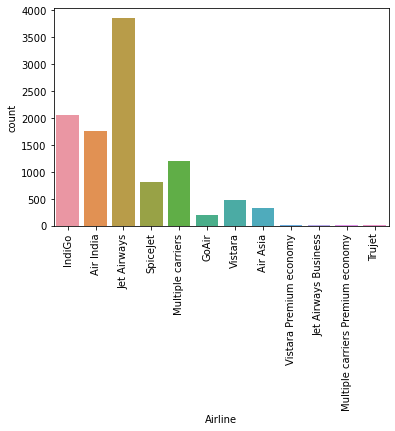

In [130]:
#most booked flight
ax=sns.countplot(x="Airline", data=df)
ax.set_xticklabels(labels=(df['Airline'].unique()),rotation=90)

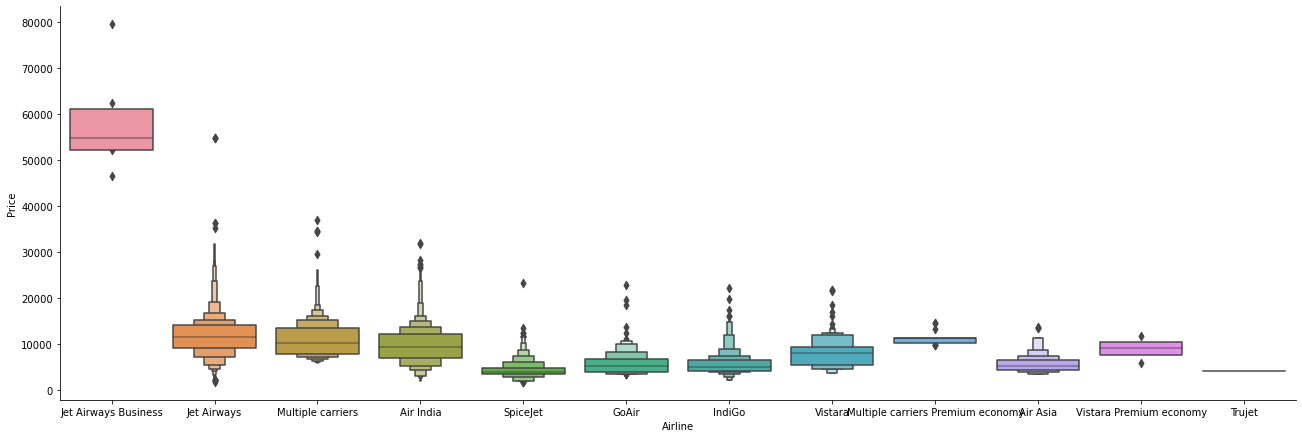

In [131]:
# Airline vs Price
sns.catplot(x = "Airline",y = "Price", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:ylabel='month_of_Journey'>

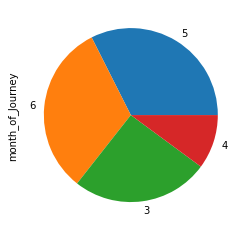

In [132]:
#in which month of year the flight travel is at high frquency
df['month_of_Journey'].value_counts().plot(kind='pie')
#may is the holiday month for students

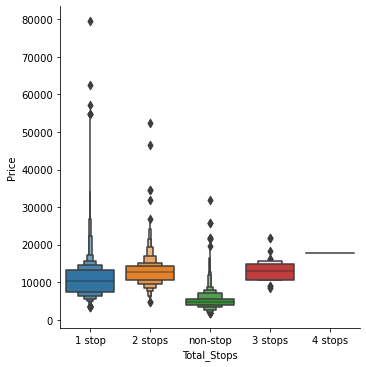

In [133]:
# no.of.stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False),kind='boxen')
plt.show()

[Text(0, 0, 'Air Asia'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'GoAir'),
 Text(3, 0, 'IndiGo'),
 Text(4, 0, 'Jet Airways'),
 Text(5, 0, 'Jet Airways Business'),
 Text(6, 0, 'Multiple carriers'),
 Text(7, 0, 'Multiple carriers Premium economy'),
 Text(8, 0, 'SpiceJet'),
 Text(9, 0, 'Trujet'),
 Text(10, 0, 'Vistara'),
 Text(11, 0, 'Vistara Premium economy')]

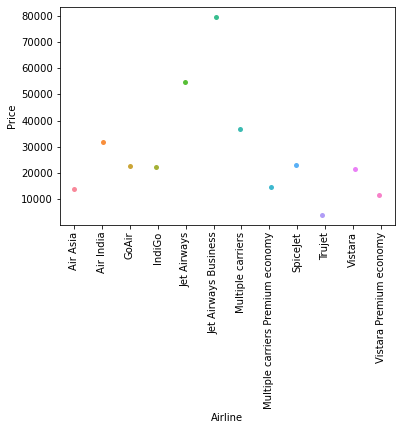

In [134]:
#which airline charges the most expensive fair in india
a=df.groupby('Airline').max()
a['Airline']=a.index
ax=sns.stripplot(x='Airline',y='Price',data=a)
ax.set_xticklabels(labels=(a['Airline'].unique()),rotation=90)

<BarContainer object of 4 artists>

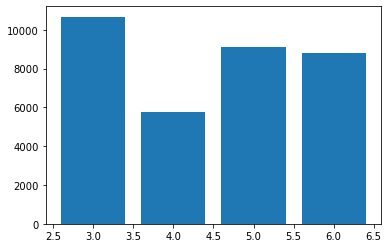

In [135]:
month_price=df.groupby('month_of_Journey')['Price'].mean()
plt.bar(month_price.index,month_price)

In [136]:
df['Total_Stops_coded']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4})

In [137]:
#Airline, source, Destination are nominal dataset so we are using Onehotenocoder
Airline= df['Airline']
Airline= pd.get_dummies(Airline,drop_first=True)
source= df['Source']
source= pd.get_dummies(source,drop_first=True)
destination= df['Destination']
destination=pd.get_dummies(destination,drop_first=True)

#concatenating the encoded columns into the dataset
data= pd.concat([df,Airline,source,destination],axis=1)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [138]:
#dropping the nominal categorical data
data.drop(columns=['Airline','Source','Destination'],inplace=True)
data.head()

,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [139]:
#dropping additional value since it has no info 
#dropping route because the price is determined based on source destination and no of stops rather than the route it takes
#dropping the total stops column
data.drop(columns=['Route','Additional_Info','Total_Stops'],inplace=True)
data.head()

,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Stops_coded,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,...,0,0,0,0,0,0,0,0,0,1


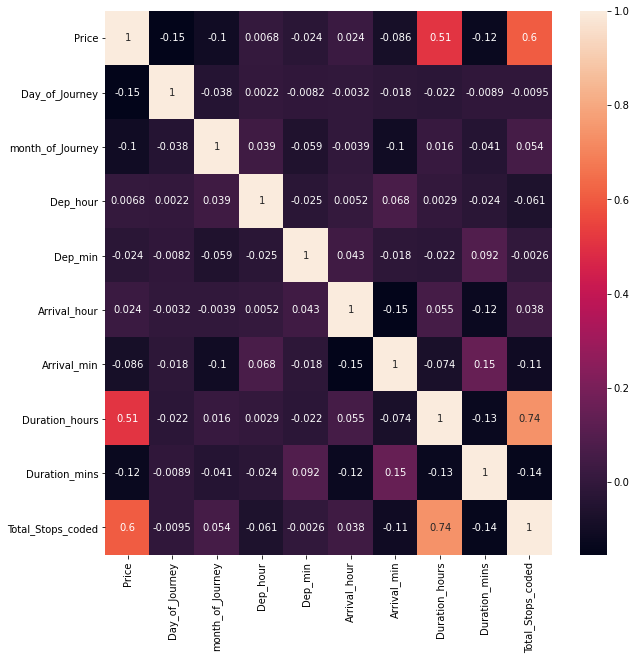

In [140]:
plt.figure(figsize=(10,10),facecolor='white')
ax = sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Correlation of each features with target variable Price'}>

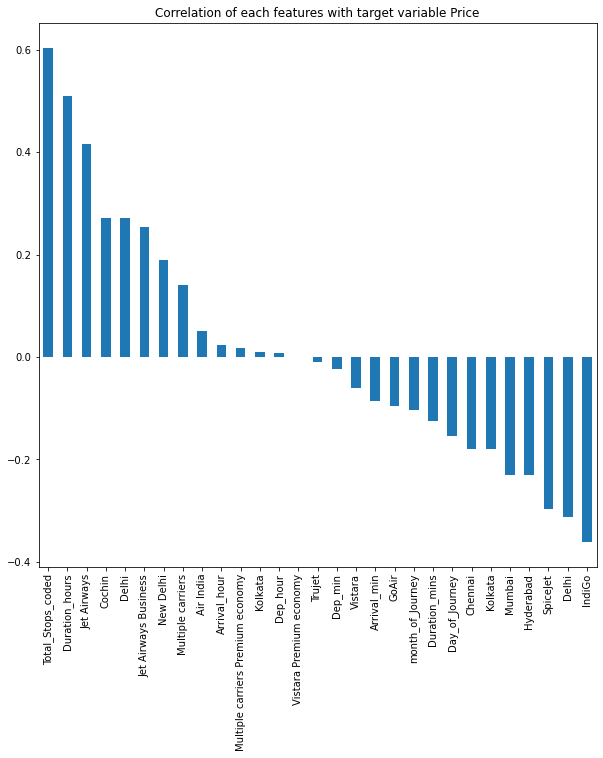

In [151]:
#correlation with the target variable
plt.figure(figsize=(10,10),facecolor='white')
corr_data= data.corr()
corr_data=corr_data.Price.sort_values(ascending=False).drop(['Price'])
corr_data.plot(kind='bar',title='Correlation of each features with target variable Price')

***MODEL BUILDING***

In [152]:
#separating target variable and features
x= data.drop(columns='Price')
y=data.Price

In [153]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=41)

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

print('Our model fits ',rf.score(x_train,y_train),' of our data')
print('R2 score for the model is', r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

Our model fits  0.9561997651932195  of our data
R2 score for the model is 0.7882958622139211
MSE: 4314498.712880744
RMSE: 2077.137143493598


Our Model gives an accuracy score of 78% which is satisfactory.